In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("CarPrice.csv")

In [3]:
df.shape

(205, 26)

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
df.drop(["car_ID"],axis=1,inplace=True)

**Check for null value**

In [7]:
null_sum=df.isnull().sum()
null_ratio=df.isnull().sum()/df.shape[0]
pd.DataFrame([null_sum,null_ratio],index=["Null_sum","Null_ratio"])

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
Null_sum,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Null_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
pd.DataFrame([df.nunique(),df.dtypes],index=["num_unique","dtypes"])

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
num_unique,6,147,2,2,2,5,3,2,53,75,44,49,171,7,7,44,8,38,37,32,59,23,29,30,189
dtypes,int64,object,object,object,object,object,object,object,float64,float64,float64,float64,int64,object,object,int64,object,float64,float64,float64,int64,int64,int64,int64,float64


**Reprsent some columns as category**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [10]:
col="CarName fueltype aspiration doornumber carbody drivewheel enginelocation fuelsystem enginetype cylindernumber".split()
df[col]=df[col].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   symboling         205 non-null    int64   
 1   CarName           205 non-null    category
 2   fueltype          205 non-null    category
 3   aspiration        205 non-null    category
 4   doornumber        205 non-null    category
 5   carbody           205 non-null    category
 6   drivewheel        205 non-null    category
 7   enginelocation    205 non-null    category
 8   wheelbase         205 non-null    float64 
 9   carlength         205 non-null    float64 
 10  carwidth          205 non-null    float64 
 11  carheight         205 non-null    float64 
 12  curbweight        205 non-null    int64   
 13  enginetype        205 non-null    category
 14  cylindernumber    205 non-null    category
 15  enginesize        205 non-null    int64   
 16  fuelsystem        205 non-

**Check for duplicated**

In [11]:
df.duplicated().sum()

0

**Statistics about data**

In [12]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [13]:
df.describe(include="category")

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,peugeot 504,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


# Visualization

In [14]:
numeric_df=df.select_dtypes("number")
numeric_df

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [15]:
categorical_df=df.select_dtypes("category")
categorical_df

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero giulia,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero stelvio,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi 100 ls,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi 100ls,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo 144ea,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo 244dl,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo 246,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


<function matplotlib.pyplot.show(close=None, block=None)>

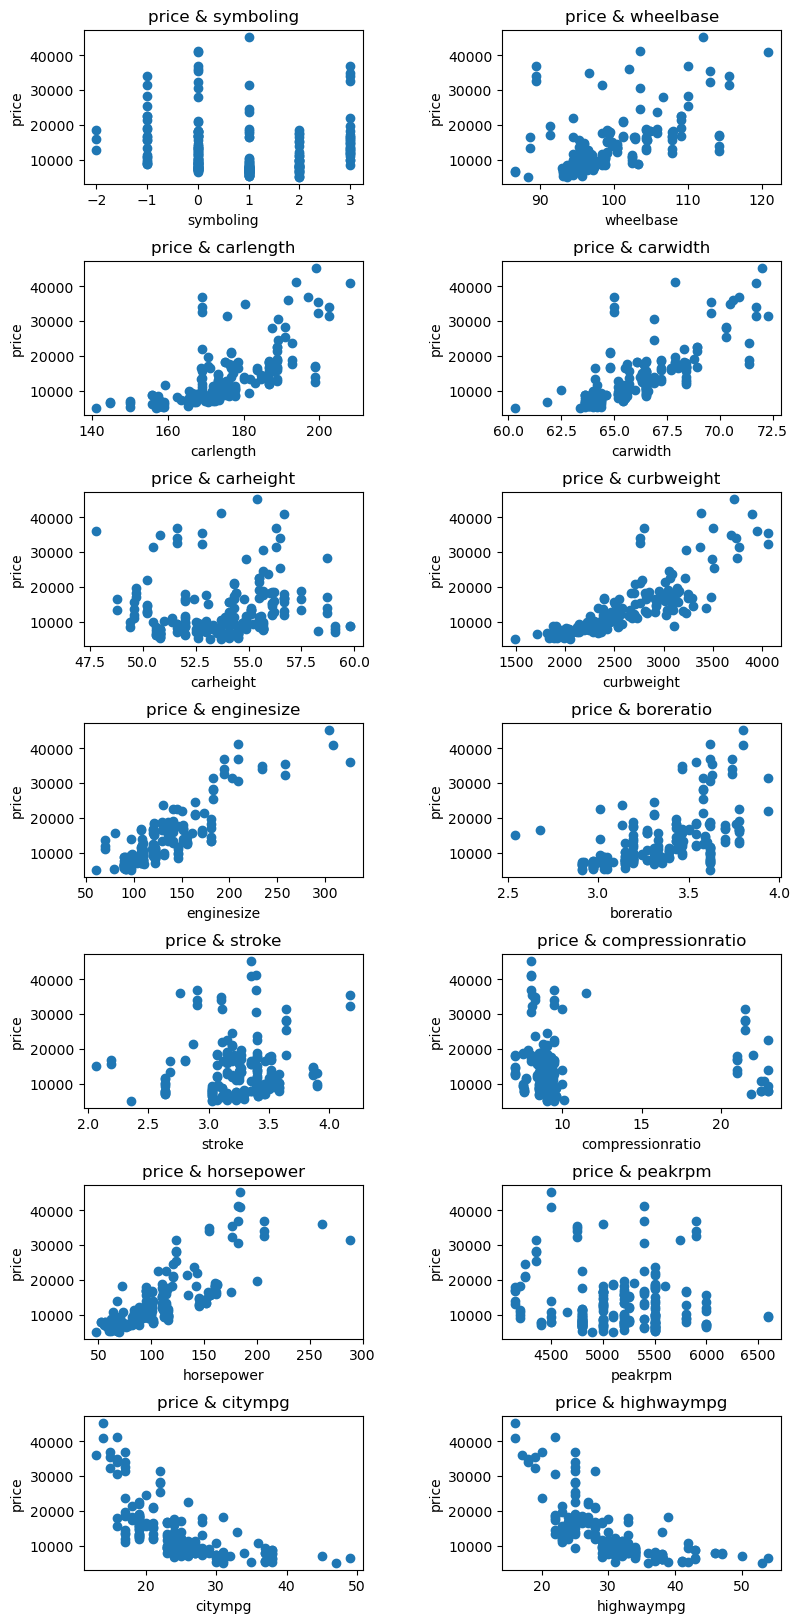

In [16]:
plt.figure(figsize=(9,20))
for i ,col in enumerate (numeric_df.columns[:-1]):
    plt.subplot(7,2,i+1)
    plt.scatter(df[col],df["price"])
    plt.ylabel("price")
    plt.xlabel(col)
    plt.title(f"price & {col}")
plt.subplots_adjust(wspace=.5,hspace=.5)
plt.show

In [17]:
corr=numeric_df.corr()
corr

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


<function matplotlib.pyplot.show(close=None, block=None)>

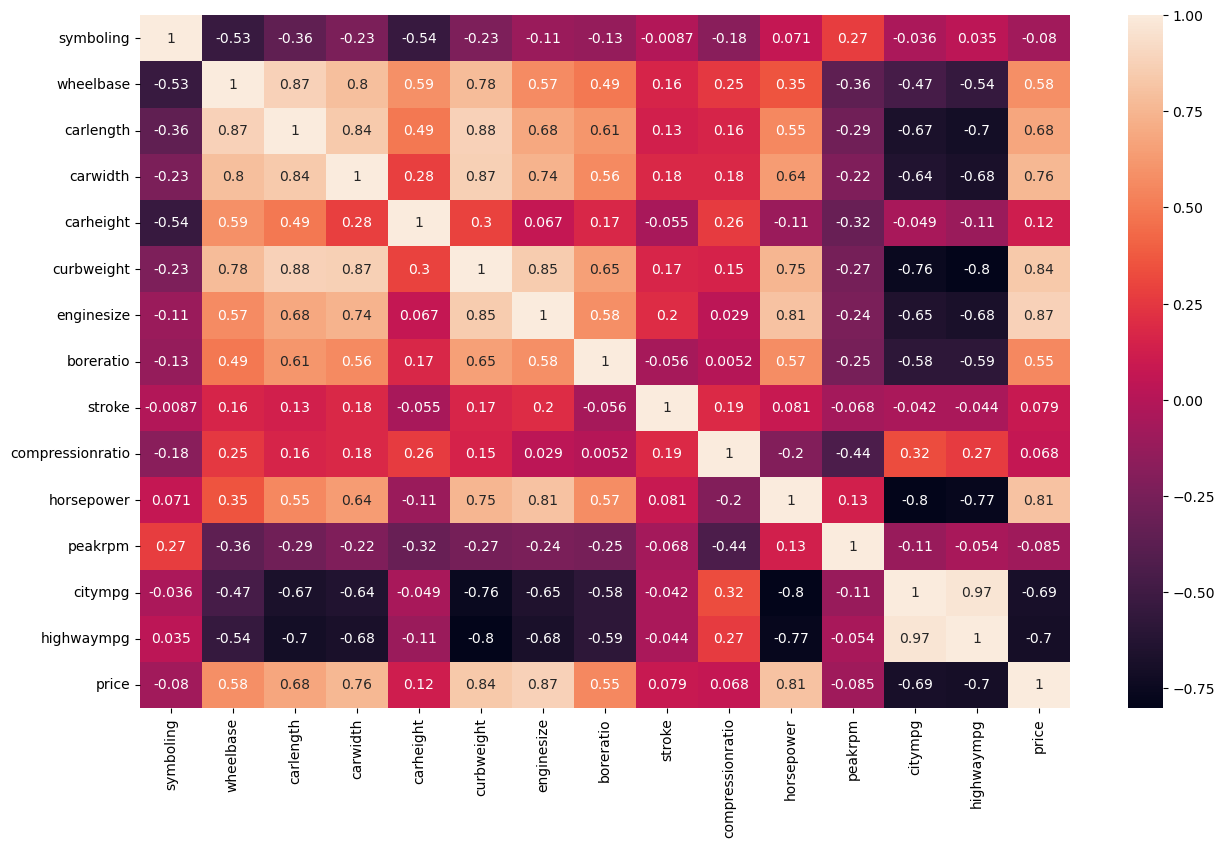

In [18]:
plt.figure(figsize=(15,9))
sns.heatmap(corr,annot=True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

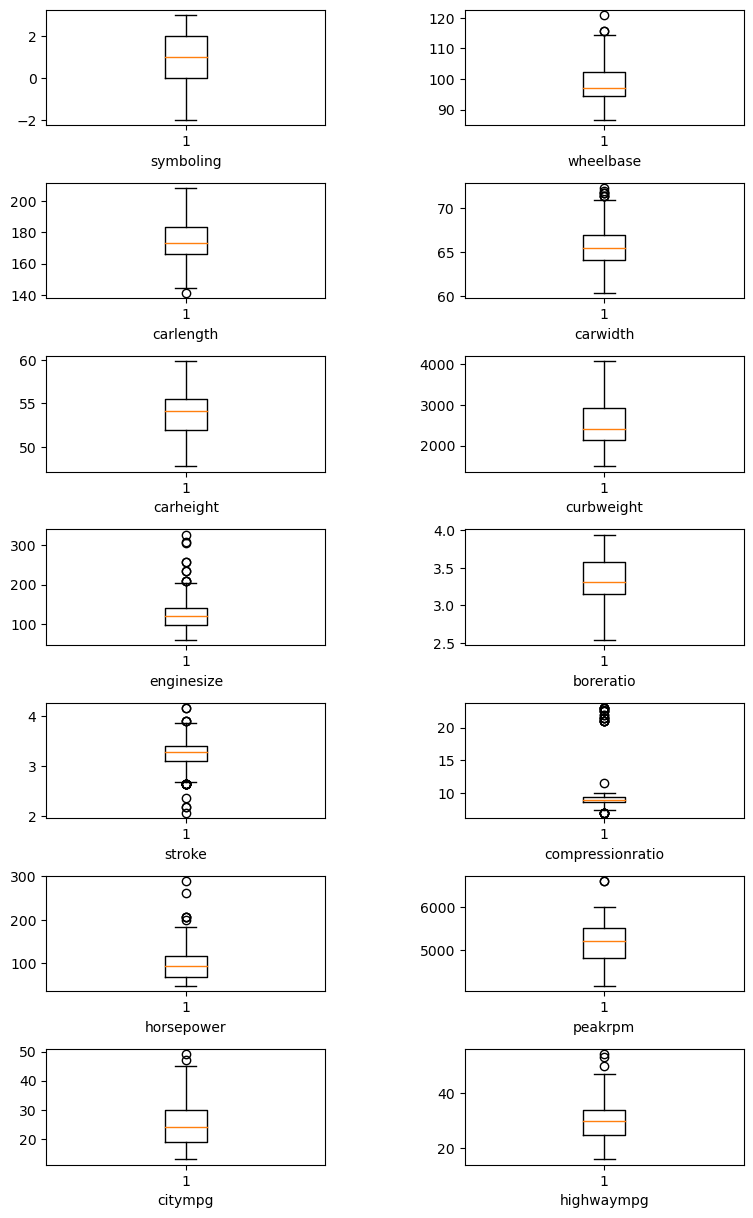

In [19]:
plt.figure(figsize=(9,15))
for i ,col in enumerate(numeric_df.columns[:-1]):
    plt.subplot(7,2,i+1)
    plt.boxplot(df[col])
    plt.xlabel(col)
plt.subplots_adjust(wspace=.5,hspace=.5)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

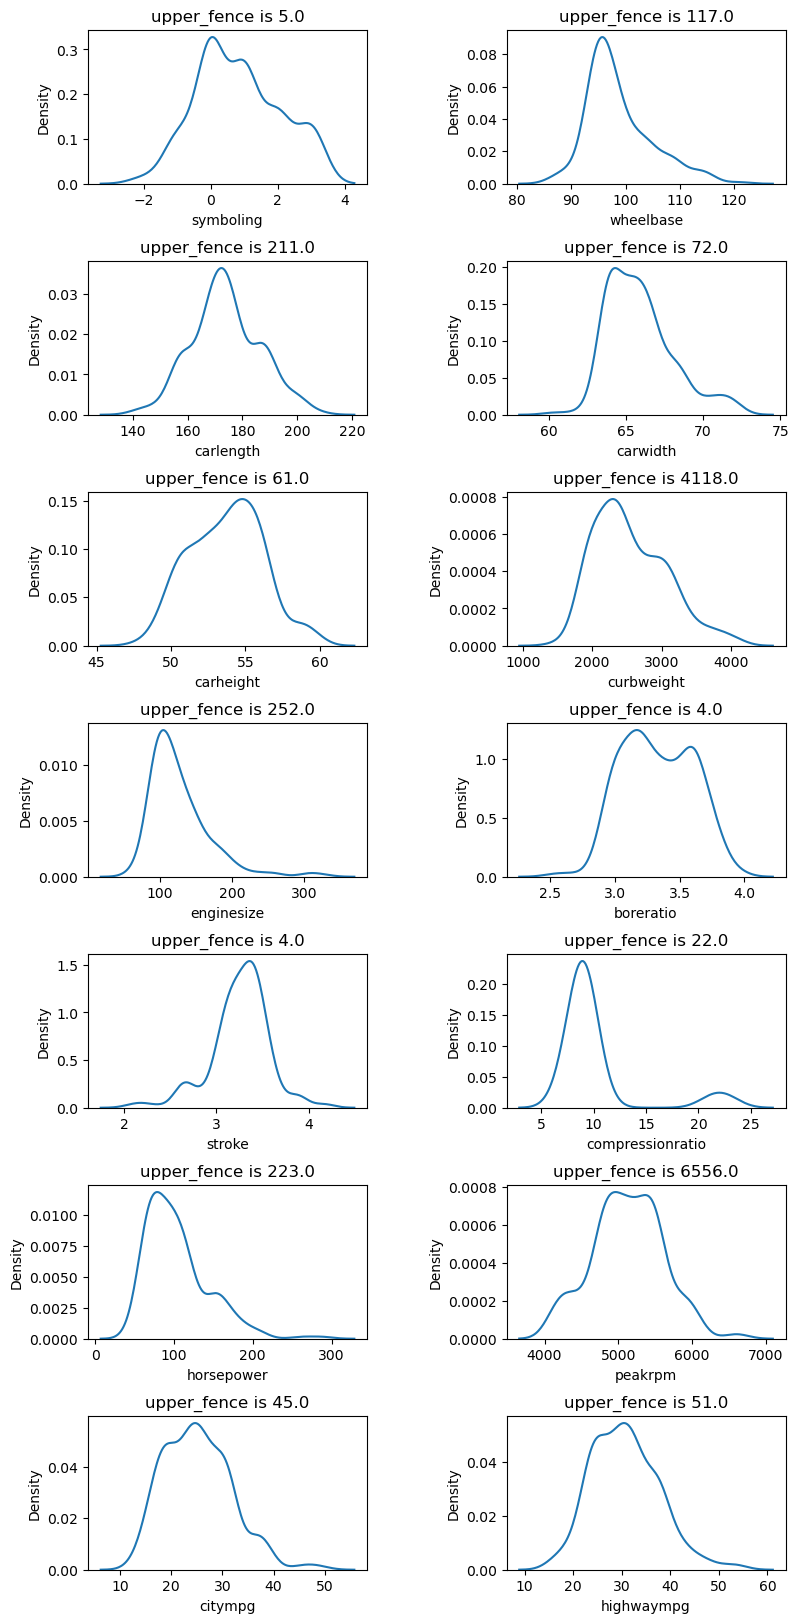

In [20]:
plt.figure(figsize=(9,20))
for i ,col in enumerate (numeric_df.columns[:-1]):
    plt.subplot(7,2,i+1)
    sns.kdeplot(df[col])
    m=df[col].mean()
    s=df[col].std()
    upper_fence=m+3*s
    plt.title(f"upper_fence is {np.round(upper_fence)}")
plt.subplots_adjust(wspace=.5,hspace=.5)
plt.show

**Check for outliers**

In [21]:
for col in numeric_df.columns[:-1]:
    Q3=df[col].quantile(.75)
    Q1=df[col].quantile(.25)
    IQR=Q3-Q1
    upper_fence=Q3+1.5*IQR
    ind=df[df[col]>np.round(upper_fence)].index
    r=1-(df[df[col]<=np.round(upper_fence)].shape[0]/df.shape[0])
    df.loc[ind,col:col]=np.round(upper_fence)
    print(f"Upper fence of {col} is: {upper_fence}")
    print(f"Ration of Outliers {r}")
    print(df[col].max())
    print("------------")

Upper fence of symboling is: 5.0
Ration of Outliers 0.0
3
------------
Upper fence of wheelbase is: 114.25000000000001
Ration of Outliers 0.034146341463414664
114.0
------------
Upper fence of carlength is: 208.29999999999995
Ration of Outliers 0.004878048780487809
208.0
------------
Upper fence of carwidth is: 71.10000000000002
Ration of Outliers 0.039024390243902474
71.0
------------
Upper fence of carheight is: 60.75
Ration of Outliers 0.0
59.8
------------
Upper fence of curbweight is: 4120.0
Ration of Outliers 0.0
4066
------------
Upper fence of enginesize is: 207.0
Ration of Outliers 0.04878048780487809
207
------------
Upper fence of boreratio is: 4.2250000000000005
Ration of Outliers 0.0
3.94
------------
Upper fence of stroke is: 3.8600000000000003
Ration of Outliers 0.009756097560975618
4.0
------------
Upper fence of compressionratio is: 10.600000000000001
Ration of Outliers 0.10243902439024388
11.0
------------
Upper fence of horsepower is: 185.0
Ration of Outliers 0.02926

<function matplotlib.pyplot.show(close=None, block=None)>

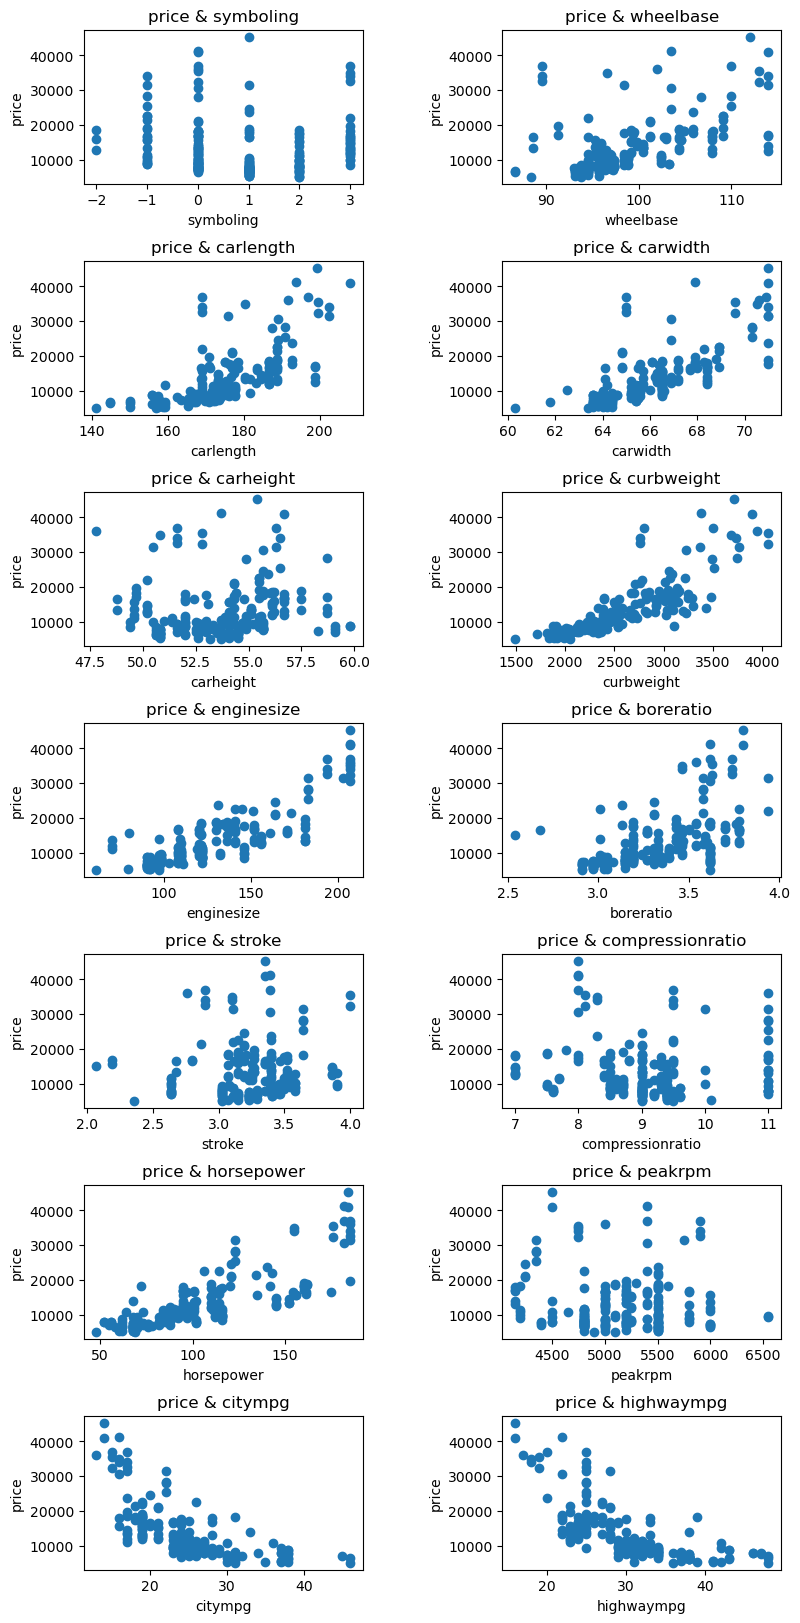

In [22]:
plt.figure(figsize=(9,20))
for i ,col in enumerate (numeric_df.columns[:-1]):
    plt.subplot(7,2,i+1)
    plt.scatter(df[col],df["price"])
    plt.ylabel("price")
    plt.xlabel(col)
    plt.title(f"price & {col}")
plt.subplots_adjust(wspace=.5,hspace=.5)
plt.show

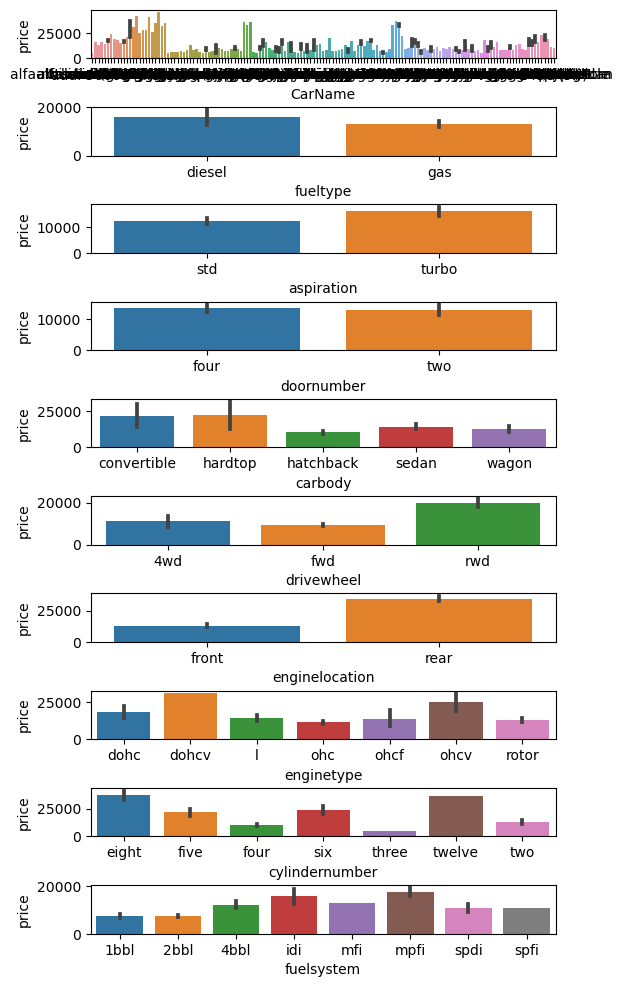

In [23]:
plt.figure(figsize=(6,12))
for i,col in enumerate (categorical_df.columns):
    plt.subplot(10,1,i+1)
    sns.barplot(x=df[col],y=df["price"])
    plt.xlabel(col)
plt.subplots_adjust(hspace=1)
plt.show()    

In [24]:
agg = df.groupby("CarName")
mean_df = agg.mean()
mean_df = mean_df.sort_values("price").tail(30)
mean_df = mean_df.reset_index()
mean_df

,CarName,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,audi 100ls,1.5,102.60,184.65,68.70,55.00,2834.0,136.0,3.190,3.400,8.25,112.5,5500.0,18.5,23.5,17580.000
1,toyota cressida,2.0,98.40,176.20,65.60,53.00,2975.0,146.0,3.620,3.500,9.30,116.0,4800.0,24.0,30.0,17669.000
2,audi 5000s (diesel),0.0,99.50,178.20,67.90,52.00,3053.0,131.0,3.130,3.400,7.00,160.0,5500.0,16.0,22.0,17859.167
3,volvo 244dl,-1.5,106.70,188.80,68.05,55.85,2973.5,157.0,3.680,3.010,9.15,124.0,5450.0,21.0,25.5,18735.000
4,audi 5000,1.0,105.80,192.70,71.00,55.70,2954.0,136.0,3.190,3.400,8.50,110.0,5500.0,19.0,25.0,18920.000
5,volvo diesel,-1.0,104.30,188.80,67.20,57.50,3157.0,130.0,3.620,3.150,7.50,162.0,5100.0,17.0,22.0,18950.000
6,nissan kicks,3.0,91.30,170.70,67.90,49.70,3139.0,181.0,3.430,3.270,7.80,185.0,5200.0,17.0,23.0,19699.000
7,volvo 264gl,-1.5,106.70,188.80,68.05,55.85,3053.5,135.5,3.700,3.150,8.50,138.0,5250.0,18.0,23.5,20522.500
8,bmw x1,0.0,101.20,176.80,64.80,54.30,2710.0,164.0,3.310,3.190,9.00,121.0,4250.0,21.0,28.0,20970.000
9,porsche macan,3.0,94.50,168.90,68.30,50.20,2778.0,151.0,3.940,3.110,9.50,143.0,5500.0,19.0,27.0,22018.000


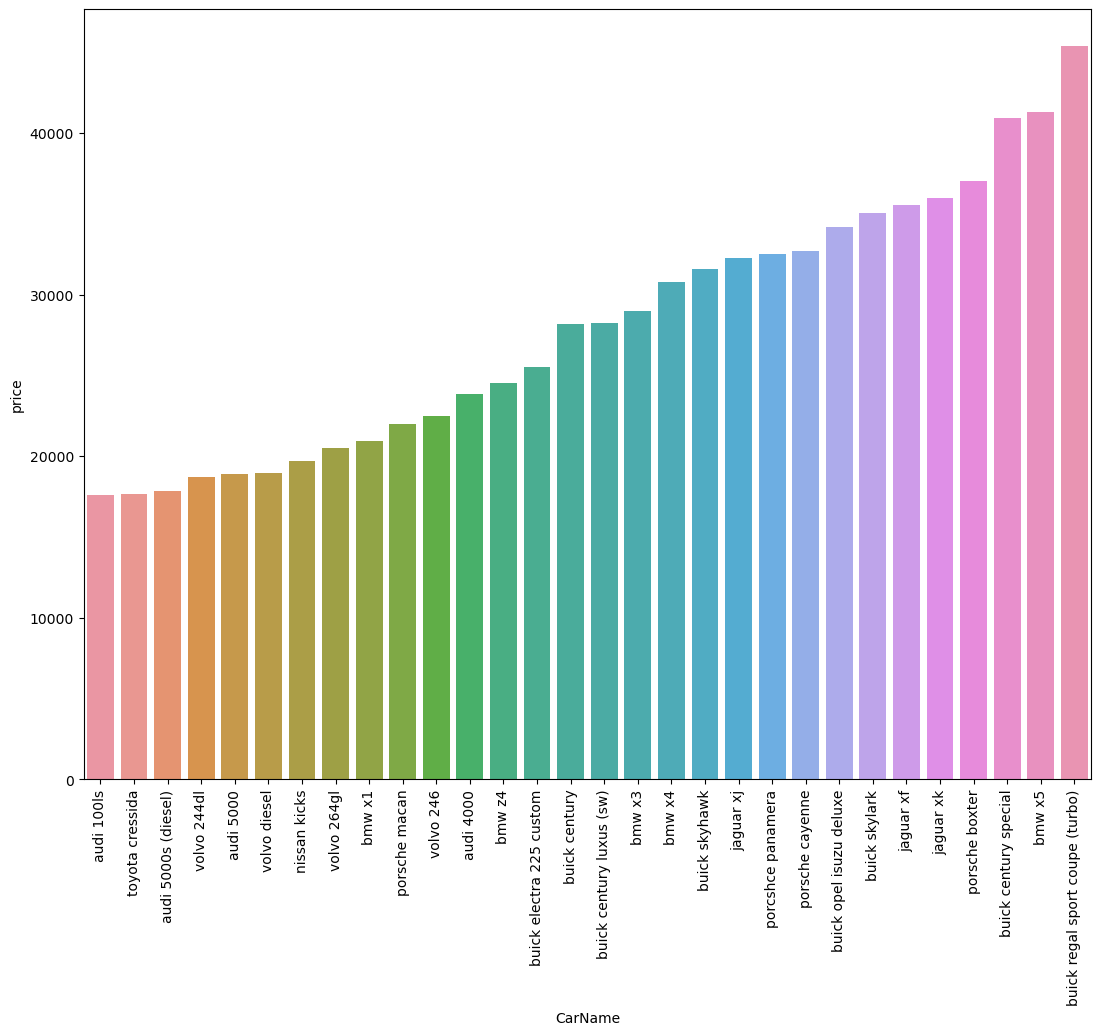

In [25]:
plt.figure(figsize=(13, 10))
mean_df = pd.DataFrame(mean_df.values, columns = mean_df.columns.to_list())
sns.barplot(x='CarName', y='price', data=mean_df)

plt.xticks(rotation=90)
plt.show()

# Split data

In [26]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1:]

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=10)

# Normilazation

In [28]:
from sklearn.preprocessing import MinMaxScaler
numeric_cols=x_train.select_dtypes("number").columns
x_scaler=MinMaxScaler()
y_scaler=MinMaxScaler()

x_train[numeric_cols]=x_scaler.fit_transform(x_train[numeric_cols])
y_train[["price"]]=y_scaler.fit_transform(y_train[["price"]])

x_test[numeric_cols]=x_scaler.transform(x_test[numeric_cols])
y_test[["price"]]=y_scaler.transform(y_test[["price"]])


# Encoding

In [29]:
#cat_cols = ['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','fuelsystem', "enginetype", "cylindernumber"]
x_train=pd.get_dummies(x_train,columns=['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','fuelsystem', "enginetype", "cylindernumber"])
x_test=pd.get_dummies(x_test,columns=['fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','fuelsystem', "enginetype", "cylindernumber"])

In [30]:
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=["CarName"])
x_train = encoder.fit_transform(x_train)
x_test = encoder.fit_transform(x_test)
x_train.head()

,symboling,CarName_0,CarName_1,CarName_2,CarName_3,CarName_4,CarName_5,CarName_6,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
87,0.6,0,0,0,0,0,0,1,0.354015,0.467862,0.476636,0.254545,0.354926,0.335616,0.450000,0.720207,0.125,0.496350,0.729730,0.28125,0.43750,0,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
170,0.8,0,0,0,0,0,1,0,0.430657,0.524664,0.495327,0.290909,0.461986,0.582192,0.771429,0.740933,0.575,0.496350,0.351351,0.31250,0.43750,0,1,1,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
174,0.2,0,0,0,0,0,1,1,0.576642,0.515695,0.579439,0.554545,0.384794,0.335616,0.521429,0.663212,1.000,0.182482,0.189189,0.50000,0.53125,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
41,0.4,0,0,0,0,1,0,0,0.361314,0.512706,0.457944,0.481818,0.378976,0.335616,0.435714,0.782383,0.500,0.386861,0.891892,0.31250,0.37500,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
80,1.0,0,0,0,0,1,0,1,0.354015,0.476831,0.476636,0.054545,0.342126,0.335616,0.450000,0.720207,0.125,0.496350,0.729730,0.28125,0.43750,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


# ML 

**Build & Train model**

In [31]:
from sklearn.linear_model import LinearRegression 
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

**Predict**

In [32]:
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)